In [107]:
import os
import pandas as pd

path2data="./data/"

path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")
labels_df=pd.read_excel(path2labels,index_col="ID")

labels_df.head()


,imgName,Fovea_X,Fovea_Y
ID,,,
1,A0001.jpg,1182.264278,1022.018842
2,A0002.jpg,967.754046,1016.946655
3,A0003.jpg,1220.206714,989.944033
4,A0004.jpg,1141.140888,1000.594955
5,A0005.jpg,1127.371832,1071.109440


In [108]:
labels_df.tail()

,imgName,Fovea_X,Fovea_Y
ID,,,
396,N0307.jpg,823.024991,690.210211
397,N0308.jpg,647.598978,795.653188
398,N0309.jpg,624.571803,755.694880
399,N0310.jpg,687.523044,830.449187
400,N0311.jpg,746.107631,759.623062


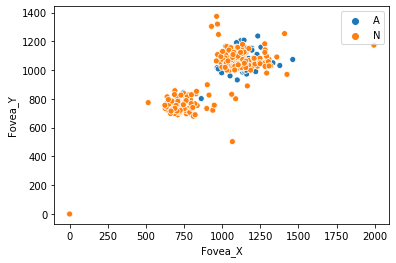

In [109]:
import seaborn as sns
%matplotlib inline

AorN=[imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'], y=labels_df['Fovea_Y'],hue=AorN)

In [110]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# fix random seed
np.random.seed(2019)

In [111]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows,ncols=2,3

<Figure size 1080x648 with 0 Axes>

In [112]:
imgName=labels_df["imgName"]
ids=labels_df.index
rndIds=np.random.choice(ids,nrows*ncols)
print(rndIds)

[ 73 371 160 294 217 191]


In [113]:
def load_img_label(labels_df,id_):
    imgName=labels_df["imgName"]
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]
    label=(x,y)
    return img,label

In [114]:
def show_img_label(img,label,w_h=(50,50),thickness=2):
    w,h = w_h
    cx,cy=label
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="green",width=thickness)
    plt.imshow(np.asarray(img))

(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


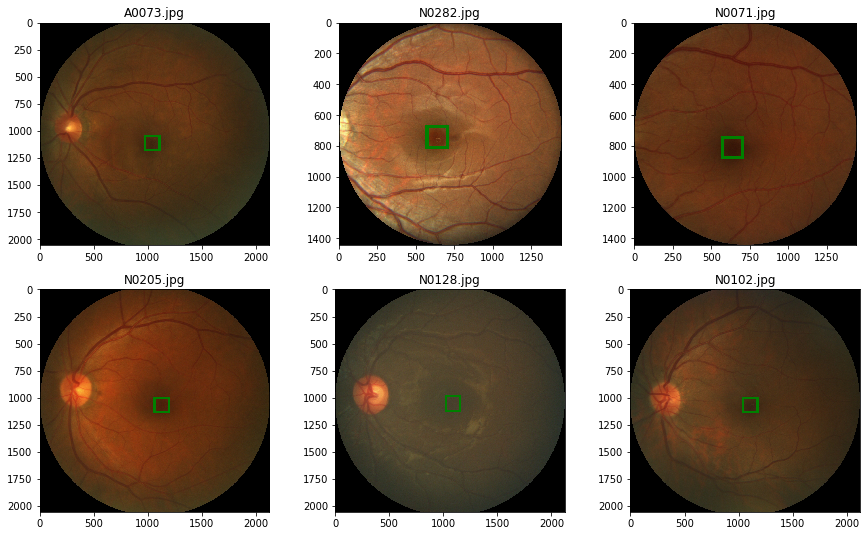

In [115]:
for i,id_ in enumerate(rndIds):
    img,label=load_img_label(labels_df,id_)
    print(img.size,label)
    plt.subplot(nrows, ncols, i+1)
    show_img_label(img,label,w_h=(150,150),thickness=20)
    plt.title(imgName[id_])

In [116]:
h_list,w_list=[],[]
for id_ in ids:
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    h,w=img.size
    h_list.append(h)
    w_list.append(w)

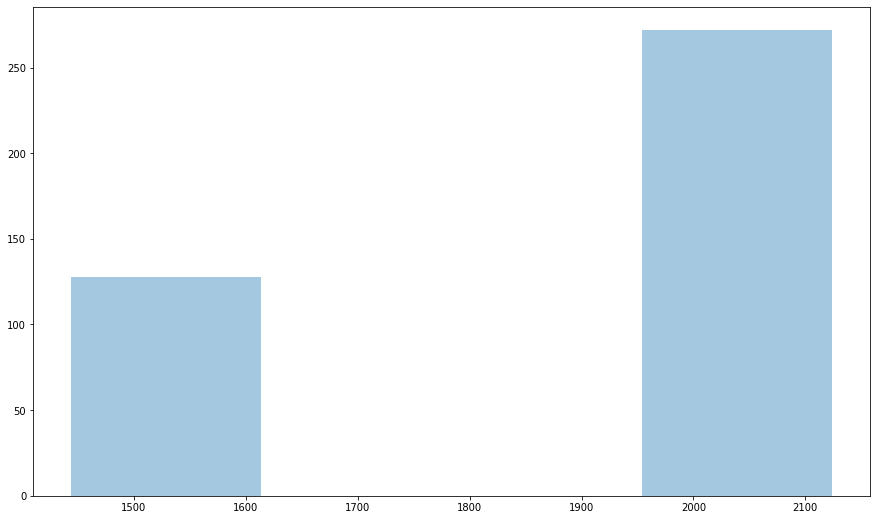

In [117]:
sns.distplot(a=h_list, kde=False)

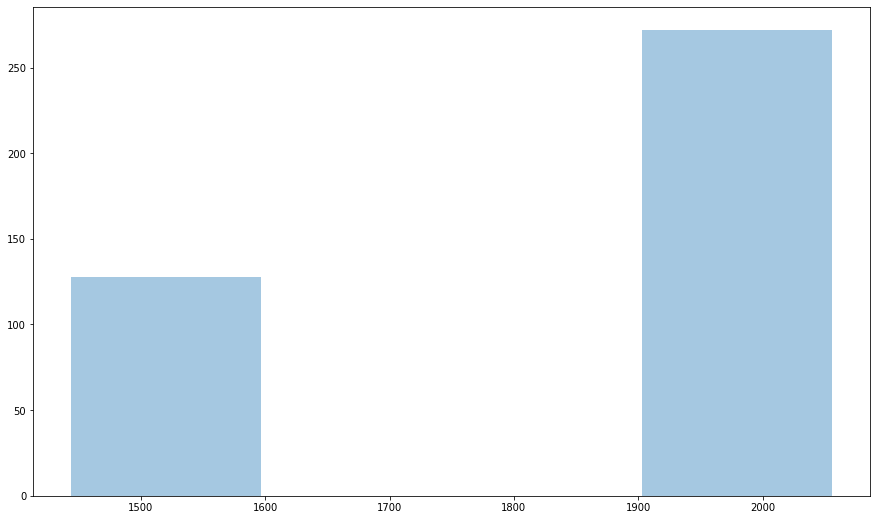

In [118]:
sns.distplot(a=w_list, kde=False)

In [119]:
import torchvision.transforms.functional as TF

def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
    w_orig,h_orig = image.size
    w_target,h_target = target_size
    cx, cy = label
    image_new = TF.resize(image,target_size)
    label_new = cx/w_orig*w_target, cy/h_orig*h_target
    return image_new, label_new

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


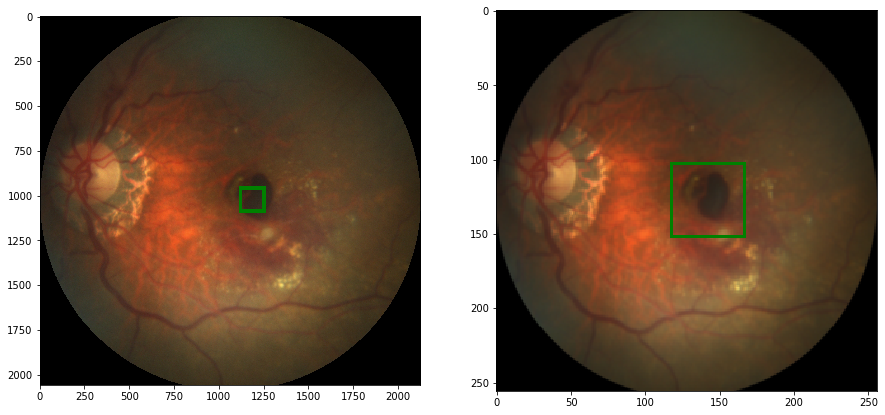

In [120]:
img, label=load_img_label(labels_df,1)
print(img.size,label)

img_r,label_r=resize_img_label(img,label)
print(img_r.size,label_r)

plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(img_r,label_r)

In [121]:
def random_hflip(image,label):
    w,h=image.size
    x,y=label
    
    image = TF.hflip(image)
    label = w-x, y
    return image,label

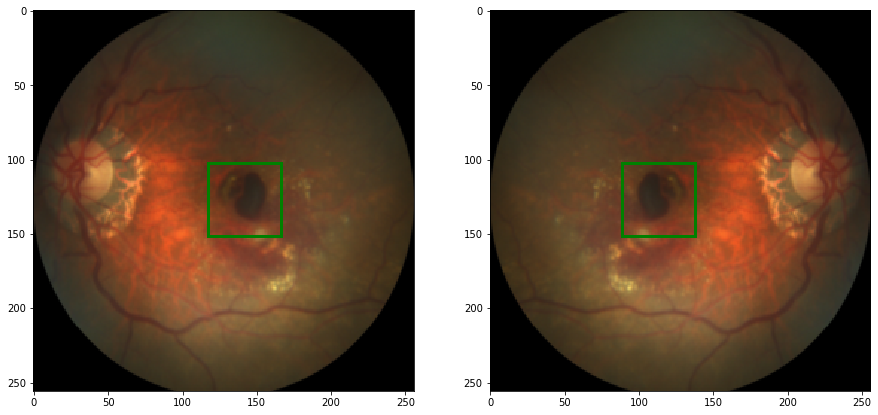

In [122]:
img, label = load_img_label(labels_df,1)
img_r, label_r = resize_img_label(img,label)
img_fh, label_fh = random_hflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r, label_r)
plt.subplot(1,2,2)
show_img_label(img_fh,label_fh)

In [123]:
def random_vflip(image,label):
    w,h=image.size
    x,y=label
    
    image = TF.vflip(image)
    label = x, w-y
    return image, label

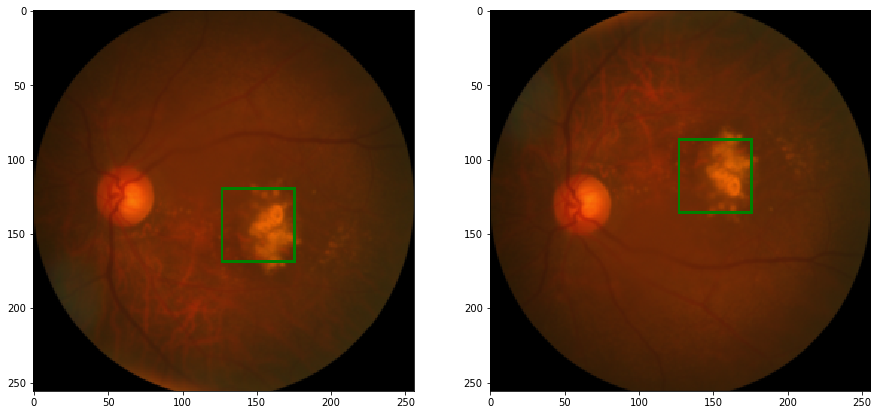

In [124]:
img, label=load_img_label(labels_df,7)
img_r, label_r=resize_img_label(img,label)
img_fv, label_fv=random_vflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fv,label_fv)

In [125]:
import numpy as np
np.random.seed(1)

def random_shift(image,label,max_translate=(0.2,0.2)):
    w,h = image.size
    max_t_w, max_t_h=max_translate
    cx, cy=label
    trans_coef=np.random.rand()*2-1
    w_t = int(trans_coef*max_t_w*w)
    h_t = int(trans_coef*max_t_h*h)
    image=TF.affine(image,translate=(w_t,h_t),shear=0,angle=0,scale=1)
    label = cx+w_t, cy+h_t
    return image,label

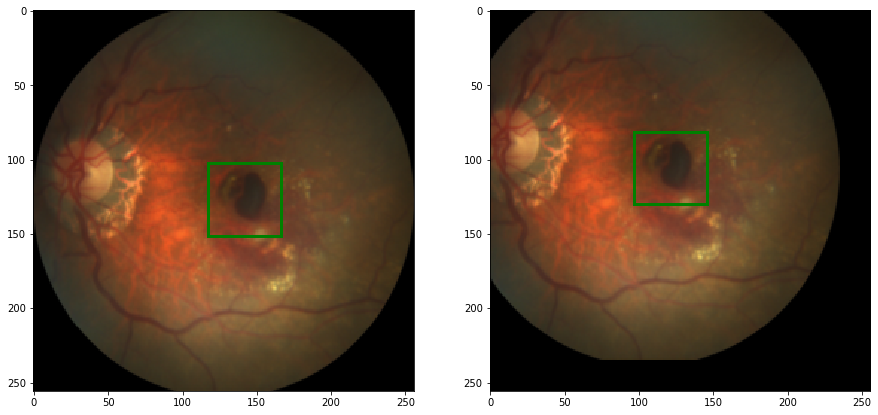

In [126]:
img, label = load_img_label(labels_df,1)
img_r, label_r = resize_img_label(img,label)
img_t, label_t = random_shift(img_r, label_r, max_translate=(.5,.5))

plt.subplot(1,2,1)
show_img_label(img_r, label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [127]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])
    
    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])
        
    image=TF.to_tensor(image)
    return image, label

In [128]:
import random
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)   

params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.2, 0.2),
}
img_t,label_t=transformer(img,label,params)

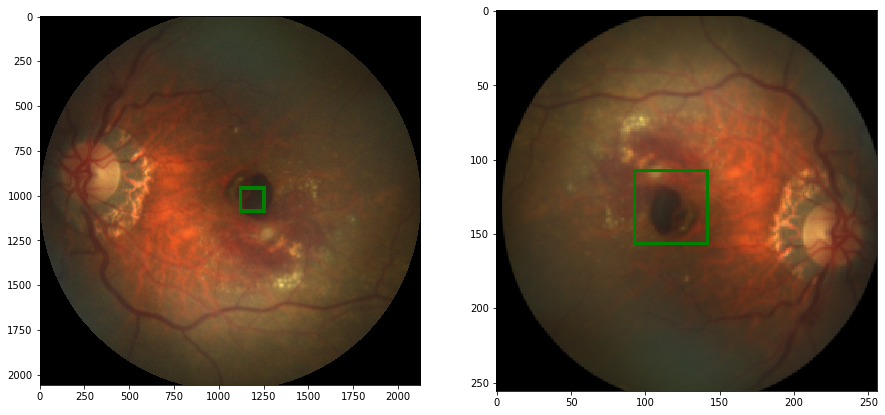

In [129]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

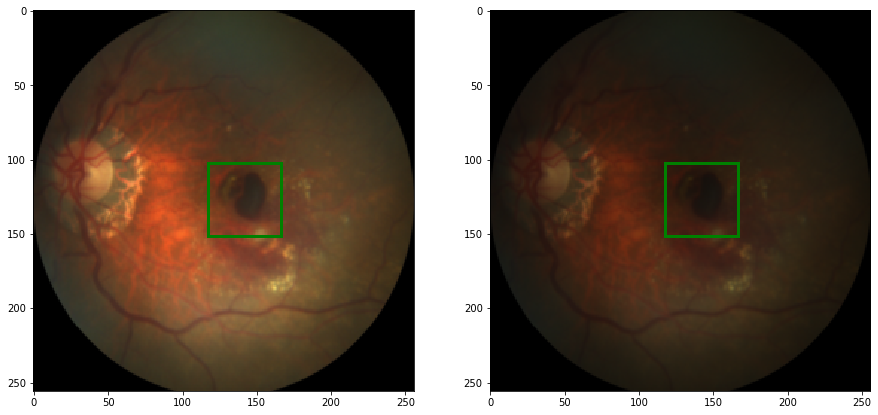

In [130]:
# load image and label
img, label = load_img_label(labels_df,1)

# resize image and label
img_r, label_r = resize_img_label(img, label)

# adjust brightness
img_t = TF.adjust_brightness(img_r, brightness_factor=0.5)
label_t = label_r

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t, label_t)

In [131]:
# brightness
img_t = TF.adjust_contrast(img_r, contrast_factor=0.4)

# gamma correction
img_t = TF.adjust_gamma(img_r, gamma=1.4)

In [132]:
def scale_label(a,b):
    div = [ai/bi for ai,bi in zip(a,b)]
    return div

In [133]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])

    if random.random() < params["p_brightness"]:
        brightness_factor=1+(np.random.rand()*2-1)*params["brightness_factor"]
        image=TF.adjust_brightness(image,brightness_factor)

    if random.random() < params["p_contrast"]:
        contrast_factor=1+(np.random.rand()*2-1)*params["contrast_factor"]
        image=TF.adjust_contrast(image,contrast_factor)

    if random.random() < params["p_gamma"]:
        gamma=1+(np.random.rand()*2-1)*params["gamma"]
        image=TF.adjust_gamma(image,gamma)

    if params["scale_label"]:
        label=scale_label(label,params["target_size"])
        
    image=TF.to_tensor(image)
    return image, label

In [134]:
np.random.seed(0)
random.seed(0)

# load image and label
img, label = load_img_label(labels_df,1)

In [135]:
params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma": 0.4,
    "scale_label": False,
}
img_t,label_t=transformer(img,label,params)

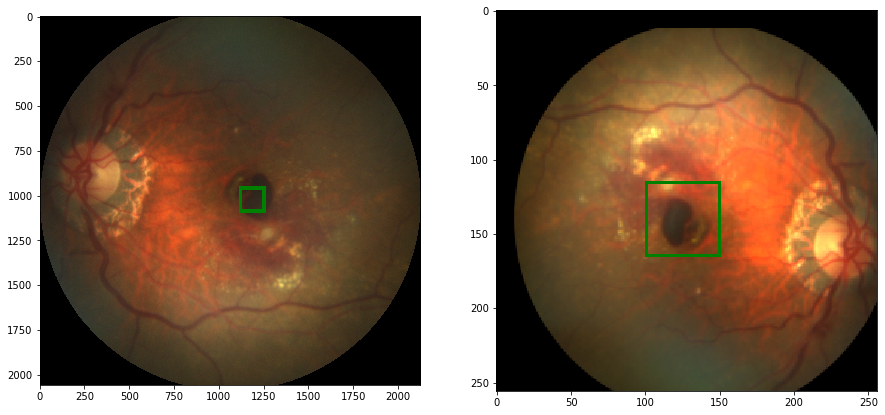

In [136]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

In [137]:
def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

In [138]:
from torch.utils.data import Dataset
from PIL import Image

In [139]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):
        pass
    def __len__(self):
        # return size of dataset
        return len(self.labels)
    def __getitem__(self, idx):
        pass

In [140]:
def __init__(self, path2data, transform, trans_params):      

    # full path of the labels file
    path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")

    # read and extract labels
    labels_df=pd.read_excel(path2labels,index_col="ID")
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values

    # extract ID and imgName columns
    self.imgName=labels_df["imgName"]
    self.ids=labels_df.index

    self.fullPath2img=[0]*len(self.ids)
    for id_ in self.ids:
        if self.imgName[id_][0]=="A":
            prefix="AMD"
        else:
            prefix="Non-AMD"
        self.fullPath2img[id_-1]=os.path.join(path2data,"Training400",prefix,self.imgName[id_])

    self.transform = transform
    self.trans_params=trans_params

In [141]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])  
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

In [142]:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [143]:
trans_params_train={
    "target_size": (256,256),
    "p_hflip": 0.5,
    "p_vflip": 0.5,
    "p_shift": 0.5,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.5,
    "brightness_factor": 0.2,
    "p_contrast": 0.5,
    "contrast_factor": 0.2,
    "p_gamma": 0.5,
    "gamma": 0.2,
    "scale_label": True,
}

In [144]:
trans_params_val={
    "target_size": (256, 256),
    "p_hflip": 0.0,
    "p_vflip": 0.0,
    "p_shift": 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,
}

In [145]:
amd_ds1=AMD_dataset(path2data,transformer,trans_params_train)
amd_ds2=AMD_dataset(path2data,transformer, trans_params_val)

In [146]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

320
----------
80


In [147]:
from torch.utils.data import Subset

train_ds = Subset(amd_ds1, train_index)
print(len(train_ds))

val_ds = Subset(amd_ds2, val_index)
print(len(val_ds))

320
80


In [148]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fix random seed
np.random.seed(0)

In [149]:
def show(img, label=None):
    npimg = img.numpy().transpose((1,2,0))
    plt.imshow(npimg)
    if label is not None:
        label = rescale_label(label, img.shape[1:])
        x,y = label
        plt.plot(x,y, 'b+', markersize=20)

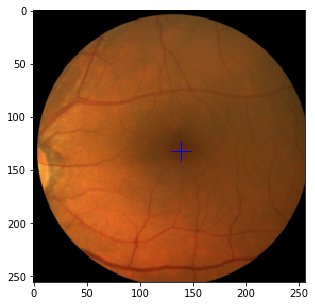

In [150]:
plt.figure(figsize=(5,5))
for img,label in train_ds:
    show(img,label)
    break

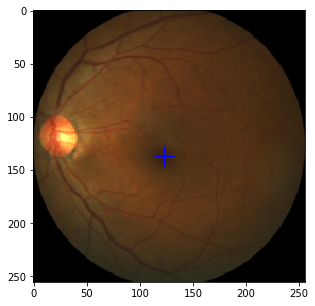

In [151]:
plt.figure(figsize=(5,5))
for img,label in val_ds:
    show(img,label)
    break

In [152]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [154]:
for img_b, label_b in train_dl:
    print(img_b.shape, img_b.dtype)
    print(label_b)
    break

torch.Size([8, 3, 256, 256]) torch.float32
[tensor([0.5363, 0.5384, 0.5019, 0.5486, 0.6346, 0.4719, 0.5017, 0.4788],
       dtype=torch.float64), tensor([0.6153, 0.5453, 0.5661, 0.4499, 0.6475, 0.5597, 0.5723, 0.5087],
       dtype=torch.float64)]


In [156]:
import torch

# extract a batch from training data
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)
    
    # convert list to tensor
    label_b = torch.stack(label_b, 1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape, label_b.dtype)
    break

torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [157]:
for img_b, label_b in val_dl:
    print(img_b.shape, img_b.dtype)
    
    # convert to tensor
    label_b = torch.stack(label_b,1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32
